<a href="https://colab.research.google.com/github/santiornelas23/Dashboard-Power-BI-Patentes/blob/main/Mapa_de_concentracion_de_patentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

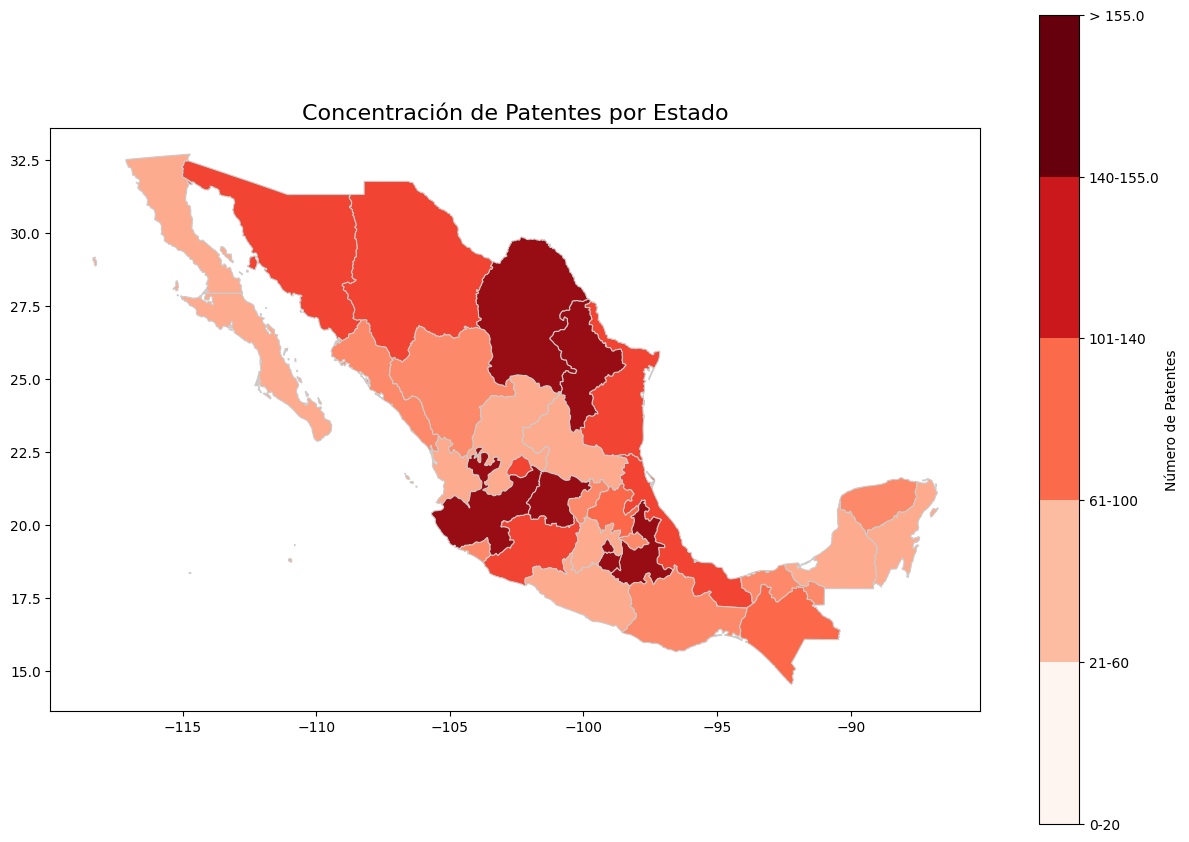

In [ ]:
!pip install geopy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import matplotlib as mpl

# Ruta del archivo GeoJSON y Excel
geojson_path = "/content/mexicoHigh.json"
excel_path = "/content/Colab 2.xlsx"

# Cargar los datos GeoJSON
estados = gpd.read_file(geojson_path)

# Cargar los datos de patentes desde Excel
patentes_df = pd.read_excel(excel_path)

# Inicializar geocodificador con RateLimiter para evitar bloqueos
geolocator = Nominatim(user_agent="my_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un caché para almacenar las coordenadas
from functools import lru_cache
@lru_cache(maxsize=None)
def get_coordinates(location):
    return geocode(location)

# Geocodificar la columna "original_state" y obtener latitud y longitud
patentes_df['location'] = patentes_df['original_state'].apply(get_coordinates)
patentes_df['Latitud'] = patentes_df['location'].apply(lambda loc: loc.latitude if loc else None)
patentes_df['Longitud'] = patentes_df['location'].apply(lambda loc: loc.longitude if loc else None)

# Normalizar las columnas antes de realizar la fusión
estados['name'] = estados['name'].str.lower().str.strip()
patentes_df['original_state'] = patentes_df['original_state'].str.lower().str.strip()

# Agrupar por estado y contar las patentes
patentes_por_estado = patentes_df.groupby('original_state').size().reset_index(name='count')

# Unir datos de patentes con los datos geoespaciales (usando 'original_state' normalizado)
municipios = estados.merge(
    patentes_por_estado,
    left_on="name",
    right_on="original_state",
    how="left"
)

# Rellenar los valores NaN en la columna 'count' con 0
municipios['count'] = municipios['count'].fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Dividir la cantidad de patentes en 5 partes (quintiles)
quantiles = municipios['count'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

# Definir una función para asignar colores a los quintiles
def color_map(count):
    if count <= quantiles[1]:
        return plt.cm.Reds(0.3)  # Quintil 1 (más bajo)
    elif count <= quantiles[2]:
        return plt.cm.Reds(0.4)  # Quintil 2
    elif count <= quantiles[3]:
        return plt.cm.Reds(0.5)  # Quintil 3
    elif count <= quantiles[4]:
        return plt.cm.Reds(0.6)  # Quintil 4
    else:
        return plt.cm.Reds(0.9)  # Quintil 5 (más alto)

# Aplicar la función de color al mapa
municipios.plot(
    ax=ax,
    color=[color_map(count) for count in municipios['count']],
    linewidth=0.8,
    edgecolor='0.8',
)

# Definir límites personalizados para los quintiles
# Asegúrate de que estos límites sean apropiados para tus datos
bounds = [0, 20, 60, 100, 140, municipios['count'].max()]

# Agregar simbología con los rangos de cada quintil
cmap = plt.cm.Reds
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Añadir la barra de color con etiquetas para cada rango
cbar = fig.colorbar(sm, ax=ax, label="Número de Patentes", shrink=0.7, ticks=bounds)

# Etiquetas para los rangos personalizados - 6 etiquetas para que coincida con los bounds
labels = ["0-20", "21-60", "61-100", "101-140", f"{bounds[-2]}-{bounds[-1]}", f"> {bounds[-1]}"]  # Changed this line
cbar.ax.set_yticklabels(labels)

plt.title("Concentración de Patentes por Estado", fontsize=16)
plt.show()

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

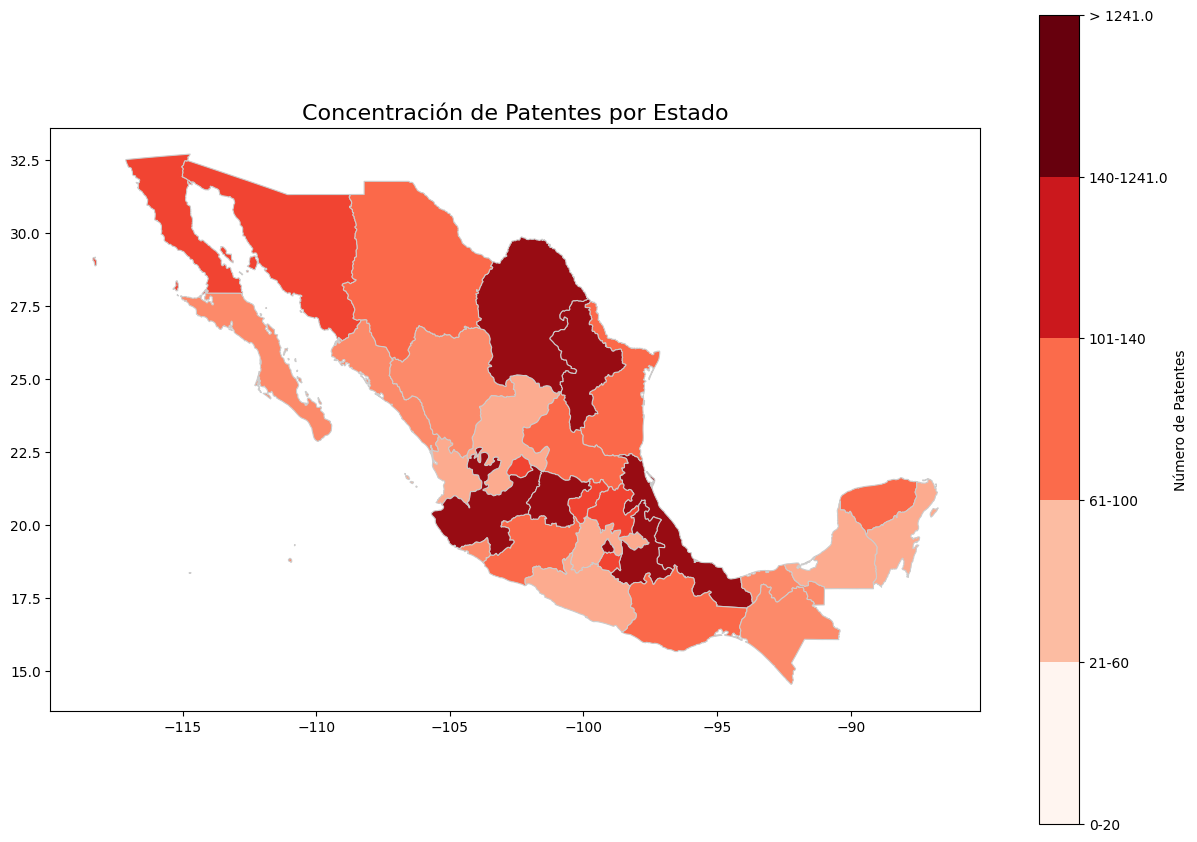

In [ ]:
!pip install geopy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import matplotlib as mpl

# Ruta del archivo GeoJSON y Excel
geojson_path = "/content/mexicoHigh.json"
excel_path = "/content/Direcciones.xlsx"

# Cargar los datos GeoJSON
estados = gpd.read_file(geojson_path)

# Cargar los datos de patentes desde Excel
patentes_df = pd.read_excel(excel_path)

# Inicializar geocodificador con RateLimiter para evitar bloqueos
geolocator = Nominatim(user_agent="my_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un caché para almacenar las coordenadas
from functools import lru_cache
@lru_cache(maxsize=None)
def get_coordinates(location):
    return geocode(location)

# Geocodificar la columna "state" (en lugar de "original_state") y obtener latitud y longitud
patentes_df['location'] = patentes_df['state'].apply(get_coordinates)  # Cambiar 'original_state' por 'state'
patentes_df['Latitud'] = patentes_df['location'].apply(lambda loc: loc.latitude if loc else None)
patentes_df['Longitud'] = patentes_df['location'].apply(lambda loc: loc.longitude if loc else None)

# Normalizar las columnas antes de realizar la fusión
estados['name'] = estados['name'].str.lower().str.strip()
patentes_df['state'] = patentes_df['state'].str.lower().str.strip() # Cambiar 'original_state' por 'state'

# Agrupar por estado y contar las patentes
patentes_por_estado = patentes_df.groupby('state').size().reset_index(name='count') # Cambiar 'original_state' por 'state'

# Unir datos de patentes con los datos geoespaciales (usando 'state' normalizado)
municipios = estados.merge(
    patentes_por_estado,
    left_on="name",
    right_on="state", # Cambiar 'original_state' por 'state'
    how="left"
)

# Rellenar los valores NaN en la columna 'count' con 0
municipios['count'] = municipios['count'].fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Dividir la cantidad de patentes en 5 partes (quintiles)
quantiles = municipios['count'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

# Definir una función para asignar colores a los quintiles
def color_map(count):
    if count <= quantiles[1]:
        return plt.cm.Reds(0.3)  # Quintil 1 (más bajo)
    elif count <= quantiles[2]:
        return plt.cm.Reds(0.4)  # Quintil 2
    elif count <= quantiles[3]:
        return plt.cm.Reds(0.5)  # Quintil 3
    elif count <= quantiles[4]:
        return plt.cm.Reds(0.6)  # Quintil 4
    else:
        return plt.cm.Reds(0.9)  # Quintil 5 (más alto)

# Aplicar la función de color al mapa
municipios.plot(
    ax=ax,
    color=[color_map(count) for count in municipios['count']],
    linewidth=0.8,
    edgecolor='0.8',
)

# Definir límites personalizados para los quintiles
# Asegúrate de que estos límites sean apropiados para tus datos
bounds = [0, 20, 60, 100, 140, municipios['count'].max()]

# Agregar simbología con los rangos de cada quintil
cmap = plt.cm.Reds
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Añadir la barra de color con etiquetas para cada rango
cbar = fig.colorbar(sm, ax=ax, label="Número de Patentes", shrink=0.7, ticks=bounds)

# Etiquetas para los rangos personalizados - 6 etiquetas para que coincida con los bounds
labels = ["0-20", "21-60", "61-100", "101-140", f"{bounds[-2]}-{bounds[-1]}", f"> {bounds[-1]}"]  # Changed this line
cbar.ax.set_yticklabels(labels)

plt.title("Concentración de Patentes por Estado", fontsize=16)
plt.show()

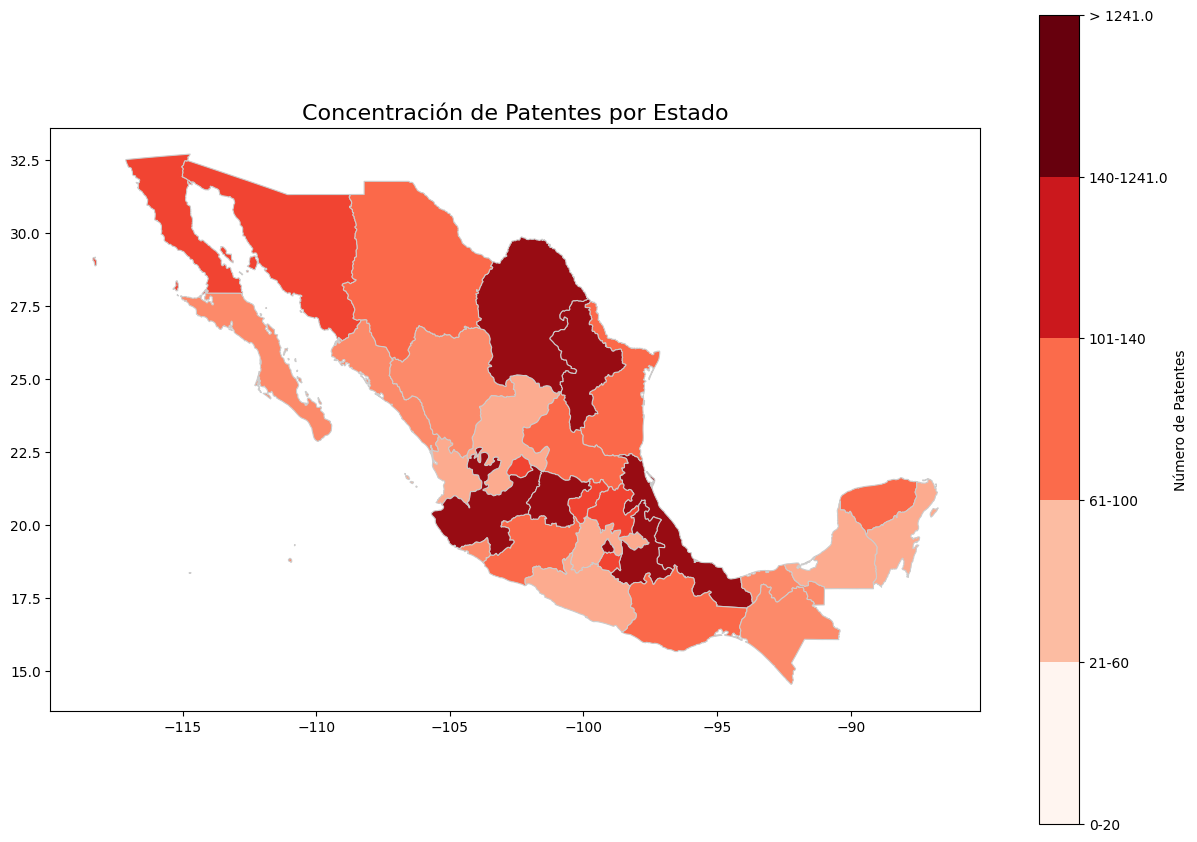

In [ ]:
!pip install geopy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import matplotlib as mpl

# Ruta del archivo GeoJSON y Excel
geojson_path = "/content/mexicoHigh.json"
excel_path = "/content/Direcciones.xlsx"

# Cargar los datos GeoJSON
estados = gpd.read_file(geojson_path)

# Cargar los datos de patentes desde Excel
patentes_df = pd.read_excel(excel_path)

# Inicializar geocodificador con RateLimiter para evitar bloqueos
geolocator = Nominatim(user_agent="my_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un caché para almacenar las coordenadas
from functools import lru_cache
@lru_cache(maxsize=None)
def get_coordinates(location):
    return geocode(location)

# Geocodificar la columna "state" (en lugar de "original_state") y obtener latitud y longitud
patentes_df['location'] = patentes_df['state'].apply(get_coordinates)  # Cambiar 'original_state' por 'state'
patentes_df['Latitud'] = patentes_df['location'].apply(lambda loc: loc.latitude if loc else None)
patentes_df['Longitud'] = patentes_df['location'].apply(lambda loc: loc.longitude if loc else None)

# Normalizar las columnas antes de realizar la fusión
estados['name'] = estados['name'].str.lower().str.strip()
patentes_df['state'] = patentes_df['state'].str.lower().str.strip() # Cambiar 'original_state' por 'state'

# Agrupar por estado y contar las patentes
patentes_por_estado = patentes_df.groupby('state').size().reset_index(name='count') # Cambiar 'original_state' por 'state'

# Unir datos de patentes con los datos geoespaciales (usando 'state' normalizado)
municipios = estados.merge(
    patentes_por_estado,
    left_on="name",
    right_on="state", # Cambiar 'original_state' por 'state'
    how="left"
)

# Rellenar los valores NaN en la columna 'count' con 0
municipios['count'] = municipios['count'].fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Dividir la cantidad de patentes en 5 partes (quintiles)
quantiles = municipios['count'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

# Definir una función para asignar colores a los quintiles
def color_map(count):
    if count <= quantiles[1]:
        return plt.cm.Reds(0.3)  # Quintil 1 (más bajo)
    elif count <= quantiles[2]:
        return plt.cm.Reds(0.4)  # Quintil 2
    elif count <= quantiles[3]:
        return plt.cm.Reds(0.5)  # Quintil 3
    elif count <= quantiles[4]:
        return plt.cm.Reds(0.6)  # Quintil 4
    else:
        return plt.cm.Reds(0.9)  # Quintil 5 (más alto)

# Aplicar la función de color al mapa
municipios.plot(
    ax=ax,
    color=[color_map(count) for count in municipios['count']],
    linewidth=0.8,
    edgecolor='0.8',
)

# Definir límites personalizados para los quintiles
# Asegúrate de que estos límites sean apropiados para tus datos
bounds = [0, 20, 60, 100, 140, municipios['count'].max()]

# Agregar simbología con los rangos de cada quintil
cmap = plt.cm.Reds
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Añadir la barra de color con etiquetas para cada rango
cbar = fig.colorbar(sm, ax=ax, label="Número de Patentes", shrink=0.7, ticks=bounds)

# Etiquetas para los rangos personalizados - 6 etiquetas para que coincida con los bounds
labels = ["0-20", "21-60", "61-100", "101-140", f"{bounds[-2]}-{bounds[-1]}", f"> {bounds[-1]}"]  # Changed this line
cbar.ax.set_yticklabels(labels)

plt.title("Concentración de Patentes por Estado", fontsize=16)
plt.show()

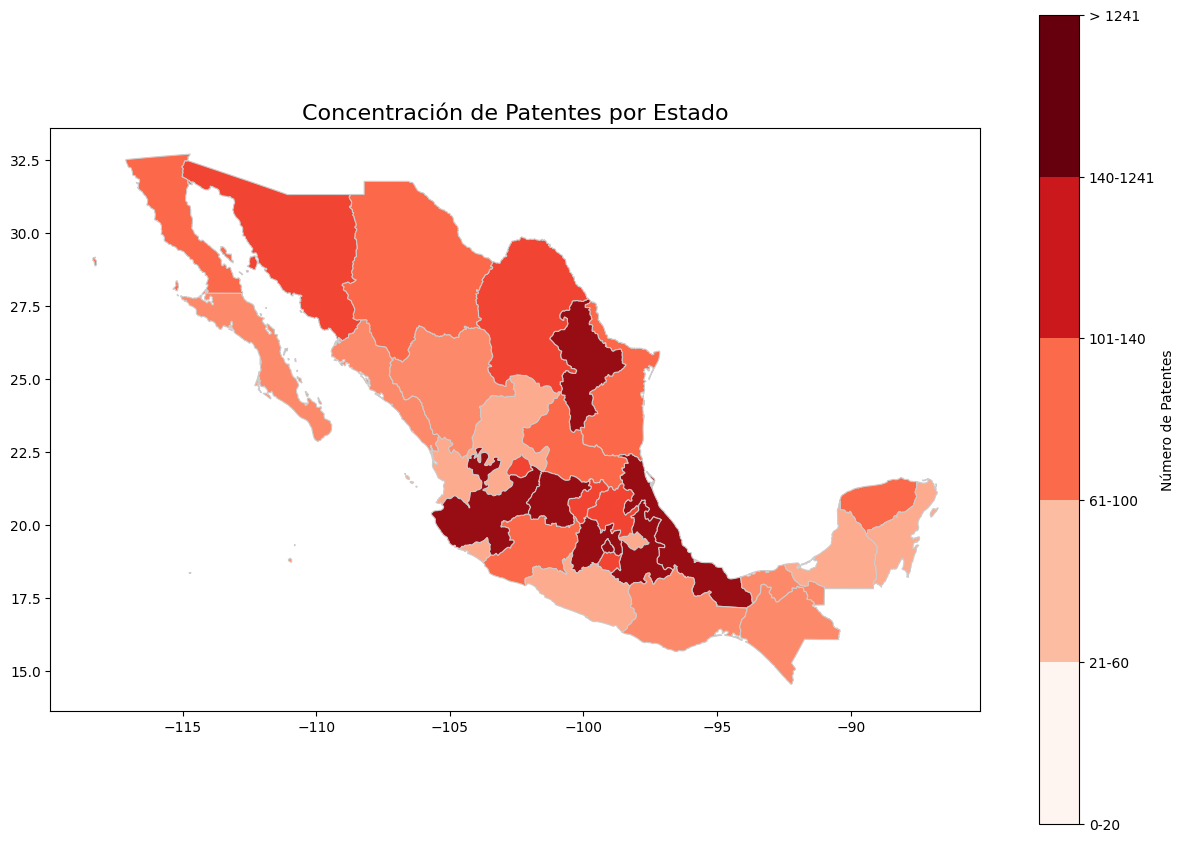

In [ ]:
!pip install geopy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
import matplotlib as mpl

# Ruta del archivo GeoJSON y Excel
geojson_path = "/content/mexicoHigh.json"  # Reemplaza con la ruta correcta a tu archivo GeoJSON
excel_path = "/content/Direcciones.xlsx"  # Reemplaza con la ruta correcta a tu archivo Excel

# Cargar los datos GeoJSON
estados = gpd.read_file(geojson_path)

# Cargar los datos de patentes desde Excel
patentes_df = pd.read_excel(excel_path)

# Reemplazar "Estado de México" con "México" en la columna 'state' del DataFrame de patentes
patentes_df['state'] = patentes_df['state'].replace('Estado de México', 'México')

# Inicializar geocodificador con RateLimiter para evitar bloqueos
geolocator = Nominatim(user_agent="my_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un caché para almacenar las coordenadas
from functools import lru_cache
@lru_cache(maxsize=None)
def get_coordinates(location):
    return geocode(location)

# Geocodificar la columna "state" y obtener latitud y longitud
patentes_df['location'] = patentes_df['state'].apply(get_coordinates)
patentes_df['Latitud'] = patentes_df['location'].apply(lambda loc: loc.latitude if loc else None)
patentes_df['Longitud'] = patentes_df['location'].apply(lambda loc: loc.longitude if loc else None)

# Normalizar las columnas antes de realizar la fusión
estados['name'] = estados['name'].str.lower().str.strip()
patentes_df['state'] = patentes_df['state'].str.lower().str.strip()

# Agrupar por estado y contar las patentes
patentes_por_estado = patentes_df.groupby('state').size().reset_index(name='count')

# Unir datos de patentes con los datos geoespaciales (usando 'state' normalizado)
municipios = estados.merge(
    patentes_por_estado,
    left_on="name",
    right_on="state",
    how="left"
)

# Rellenar los valores NaN en la columna 'count' con 0
municipios['count'] = municipios['count'].fillna(0)

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Dividir la cantidad de patentes en 5 partes (quintiles)
quantiles = municipios['count'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

# Definir una función para asignar colores a los quintiles
def color_map(count):
    if count <= quantiles[1]:
        return plt.cm.Reds(0.3)  # Quintil 1 (más bajo)
    elif count <= quantiles[2]:
        return plt.cm.Reds(0.4)  # Quintil 2
    elif count <= quantiles[3]:
        return plt.cm.Reds(0.5)  # Quintil 3
    elif count <= quantiles[4]:
        return plt.cm.Reds(0.6)  # Quintil 4
    else:
        return plt.cm.Reds(0.9)  # Quintil 5 (más alto)

# Aplicar la función de color al mapa
municipios.plot(
    ax=ax,
    color=[color_map(count) for count in municipios['count']],
    linewidth=0.8,
    edgecolor='0.8',
)

# Definir límites personalizados para los quintiles
bounds = [0, 20, 60, 100, 140, municipios['count'].max()]

# Agregar simbología con los rangos de cada quintil
cmap = plt.cm.Reds
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Añadir la barra de color con etiquetas para cada rango
cbar = fig.colorbar(sm, ax=ax, label="Número de Patentes", shrink=0.7, ticks=bounds)

# Etiquetas para los rangos personalizados
labels = ["0-20", "21-60", "61-100", "101-140", f"{bounds[-2]}-{bounds[-1]}", f"> {bounds[-1]}"]
cbar.ax.set_yticklabels(labels)

plt.title("Concentración de Patentes por Estado", fontsize=16)

# Guardar el mapa como un archivo PNG
plt.savefig("mapa_patentes.png")

plt.show()